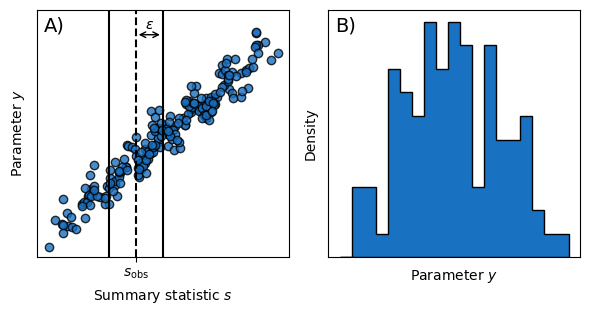

In [2]:
import matplotlib.pyplot as plt
from matplotlib import lines
import numpy as np
import os
cwd = os.getcwd()
if cwd.endswith('figure_generation'):
    cwd_prime = os.path.abspath(os.path.join(cwd, '..'))
    os.chdir(cwd_prime)
from constants.colors import colors

N = 200
ss = np.linspace(0, 3, N) + np.random.standard_normal(N)*0.5
ys = ss*2 - 0.05*ss**2 + np.random.standard_normal(N) * 0.4 + 0.4*np.sin(ss*10)

s_obs = 1
epsilon = 0.5

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3.25))

y_lim = (-2, 8)

axs[0].set_ylim(y_lim)
axs[0].scatter(ss, ys, color=colors['blue'][8], edgecolors='black', alpha=0.8)
axs[0].vlines([s_obs - epsilon, s_obs + epsilon], *y_lim, color='black')
axs[0].vlines([s_obs], *y_lim, linestyles='--', color='black')

label_y = 7
axs[0].annotate('', xy=(s_obs, label_y), xytext=(s_obs + epsilon, 7), arrowprops={'arrowstyle': '<->'})
axs[0].text(s_obs + epsilon/2, label_y + 0.25, r'$\epsilon$', horizontalalignment='center')

axs[0].set_xlabel(r'Summary statistic $s$')
axs[0].set_ylabel(r'Parameter $y$')

axs[1].set_xlabel(r'Parameter $y$')
axs[1].set_ylabel('Density')

hist_x = np.random.standard_normal(100)
n_bins = 20
bins = np.linspace(-2, 2, n_bins)
axs[1].hist(hist_x, bins, color=colors['blue'][8], edgecolor='black', histtype='stepfilled')

def add_top_left_text(label, ax):
    t = ax.text(0.025, 0.975, label, verticalalignment='top', fontsize=14, transform=ax.transAxes)
    #t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='black'))

for ax in axs:
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
axs[0].set_xticks([s_obs])
axs[0].set_xticklabels([r'$s_{\mathrm{obs}}$'])

# Add line from one subplot to the other

add_top_left_text('A)', axs[0])
add_top_left_text('B)', axs[1])

plt.tight_layout()
plt.savefig('./figure_generation/figures/abc_inference.png', dpi=fig.dpi, transparent=True, bbox_inches = "tight")
plt.savefig('./figure_generation/figures/abc_inference.pdf', dpi=fig.dpi, transparent=True, bbox_inches = "tight")

plt.show()